In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/aiffel/data/trip.csv')

# 데이터 둘러보기

In [3]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [5]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


### 데이터 둘러보기 - 결과
- 총 22701개의 열과 9개의 행으로 구성된 데이터
- passenger_name, tpep_pickup_datetme, tpep_dropoff_datetime, payment_method, passenger_count, trip_amount, fare_amount ,tip_amount, tolls_amount의 변수로 행 구성

# 결측치 판단 및 처리

In [6]:
data.isna().sum()

passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              3
tip_amount               0
tolls_amount             0
dtype: int64

In [7]:
data.isna().mean()

passenger_name           0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
payment_method           0.000000
passenger_count          0.000000
trip_distance            0.000000
fare_amount              0.000132
tip_amount               0.000000
tolls_amount             0.000000
dtype: float64

In [8]:
data[data['fare_amount'].isna()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
52,Benjamin Johnson,04/04/2017 4:22:03 PM,04/04/2017 4:35:30 PM,Cash,1,2.20,NaN,0.0,0.00
189,Maria Ibarra,08/21/2017 12:40:25 PM,08/21/2017 1:12:31 PM,Debit Card,3,15.20,NaN,5.0,0.00
244,Tina Avila,08/09/2017 8:32:09 AM,08/09/2017 9:31:11 AM,Cash,1,15.89,NaN,10.0,5.76


In [9]:
data = data. dropna()

In [10]:
data.isna().sum()

passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              0
tip_amount               0
tolls_amount             0
dtype: int64

### 결측치 유무와 비율 확인 및 처리
- 결측치는 fare_amount에서 3개가 확인됨
- 결측치 비율은 fare_amount 0.000132
- 방대한 데이터 양에 비해 결측치의 비율이 작기 때문에 결측치를 dropna()로 삭제
- 결측치 삭제가 잘 되었는지 마지막으로 확인함.

# 이상치 판단 및 처리

In [12]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22698.000000,22698.000000,22698.000000,22698.000000,22698.000000
mean,1.643581,2.912318,13.024009,1.835327,0.312302
std,1.304983,3.651335,13.240074,2.800093,1.398775
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


In [13]:
data['passenger_count'].sort_values()

12804     0
19458     0
5565      0
5670      0
13718     0
         ..
21791     6
15629     6
4854      6
0         6
64       36
Name: passenger_count, Length: 22698, dtype: int64

In [14]:
data['trip_distance'].sort_values()

293       0.00
21979     0.00
13795     0.00
10925     0.00
9665      0.00
         ...  
30       30.83
10293    31.95
6066     32.72
13863    33.92
9282     33.96
Name: trip_distance, Length: 22698, dtype: float64

In [15]:
data['fare_amount'].sort_values()

12946   -120.00
11206     -4.50
20700     -4.50
17604     -4.00
14716     -4.00
          ...  
12513    175.00
15476    200.00
13863    200.01
20314    450.00
8478     999.99
Name: fare_amount, Length: 22698, dtype: float64

In [16]:
data['tip_amount'].sort_values()

16784      0.00
8184       0.00
19799      0.00
8189       0.00
8192       0.00
          ...  
986       42.29
12513     46.69
13863     51.64
6066      55.50
8478     200.00
Name: tip_amount, Length: 22698, dtype: float64

In [17]:
data['tolls_amount'].sort_values()

0         0.00
14948     0.00
14947     0.00
14946     0.00
14945     0.00
         ...  
18890    18.00
13361    18.00
4887     18.26
16707    18.28
5273     19.10
Name: tolls_amount, Length: 22698, dtype: float64

<AxesSubplot:ylabel='passenger_count'>

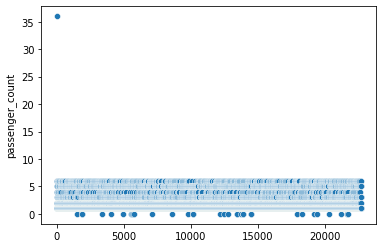

In [18]:
sns.scatterplot(x = data.index, y = data['passenger_count'])

<AxesSubplot:ylabel='trip_distance'>

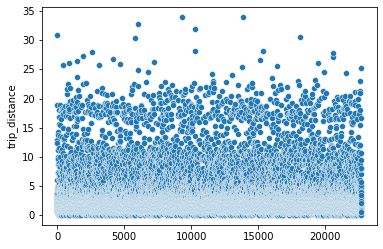

In [19]:
sns.scatterplot(x = data.index, y = data['trip_distance'])

<AxesSubplot:ylabel='fare_amount'>

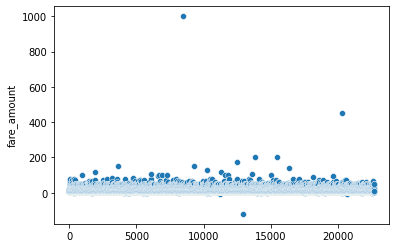

In [20]:
sns.scatterplot(x = data.index, y = data['fare_amount'])

<AxesSubplot:ylabel='tip_amount'>

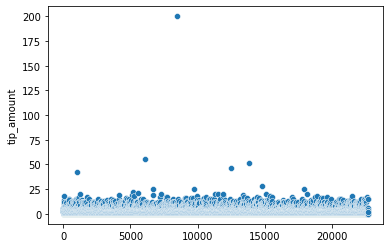

In [21]:
sns.scatterplot(x = data.index, y = data['tip_amount'])

<AxesSubplot:ylabel='tolls_amount'>

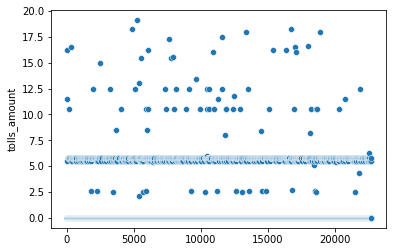

In [22]:
sns.scatterplot(x = data.index, y = data['tolls_amount'])

### 이상치 탐색의 결과
- passenger_count, trip_distance, fare_amount, tip_amount, tolls_amount에 대한 이상치를 탐색하였다.
- scatter plot으로 관찰한 결과, passenger_count와 fare_amount, 그리고 tip_amount에서 이상치가 탐색되었다는 결과가 도출

In [144]:
def pc_func(x):
    if x > 4:
        return 4
    else:
        return x

In [145]:
data['passenger_count'] = data['passenger_count'].apply(pc_func)

In [146]:
data['passenger_count']

0        4
1        1
2        1
3        1
4        1
        ..
22696    3
22697    1
22698    1
22699    1
22700    1
Name: passenger_count, Length: 22698, dtype: int64

<AxesSubplot:ylabel='passenger_count'>

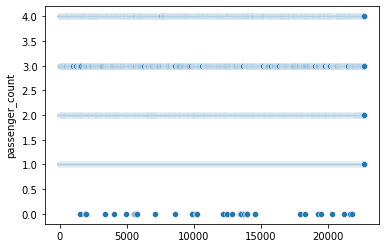

In [147]:
sns.scatterplot(x = data.index, y = data['passenger_count'])

In [148]:
def fa_func(x):
    if 0 < x < 170:
        return x
    else:
        return 13
    #data['fare_amount'].mean() -> 13.02400916380298

In [149]:
data['fare_amount'] = data['fare_amount'].apply(fa_func)

In [150]:
data['fare_amount']

0        5.0
1        5.0
2        5.0
3        5.0
4        5.0
        ... 
22696    4.0
22697    5.0
22698    4.5
22699    5.0
22700    5.0
Name: fare_amount, Length: 22698, dtype: float64

<AxesSubplot:ylabel='fare_amount'>

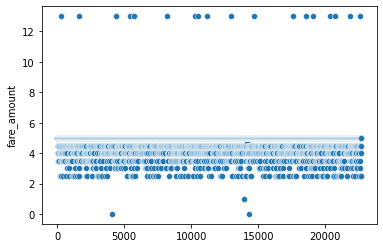

In [151]:
sns.scatterplot(x = data.index, y = data['fare_amount'])

In [152]:
def tpa_func(x):
    if x < 10:
        return x
    else:
        return 1
    #data['tip_amount'].mean() -> 1.8353269010485505

In [153]:
data['tip_amount'] = data['tip_amount'].apply(tpa_func)

In [154]:
data['tip_amount']

0        2.76
1        4.00
2        1.45
3        6.39
4        0.00
         ... 
22696    0.00
22697    1.00
22698    0.00
22699    1.70
22700    2.35
Name: tip_amount, Length: 22698, dtype: float64

<AxesSubplot:ylabel='tip_amount'>

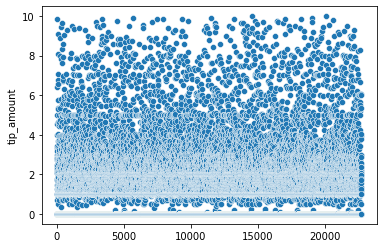

In [155]:
sns.scatterplot(x = data.index, y = data['tip_amount'])

### 이상치 제거 및 총결과
- 처음 sort.values()로 확인하고 scatter plot으로 관찰한 결과 passenger_count, fare_amount, tip_amount에서 이상치가 측정되었다
- 따라서 def 함수로 이상치를 없애기 위한 코드를 작성하여 각 3개의 칼럼에 해당하는 값들의 이상치를 제거
- 이상치 제거가 잘 되었는지 마지막 scatter plot으로 확인작업

# Credit Card와 Debit Card를 구분없이 "Card"라는 이름으로 만들어 보세요.

In [156]:
data['payment_method'] = data['payment_method'].replace({'Credit Card': 'Card', 'Debit Card':'Card'})

In [157]:
data

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,trip_duration
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,4,3.34,5.0,2.76,0.00,14.066667
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,5.0,4.00,0.00,26.500000
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,5.0,1.45,0.00,7.200000
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,5.0,6.39,0.00,30.250000
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,5.0,0.00,0.00,16.716667
...,...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,2017-02-24 17:37:23,2017-02-24 17:40:39,Cash,3,0.61,4.0,0.00,0.00,3.266667
22697,Monique Williams,2017-08-06 16:43:59,2017-08-06 17:24:47,Cash,1,16.71,5.0,1.00,5.76,40.800000
22698,Drew Graves,2017-09-04 14:54:14,2017-09-04 14:58:22,Card,1,0.42,4.5,0.00,0.00,4.133333
22699,Jonathan Copeland,2017-07-15 12:56:30,2017-07-15 13:08:26,Card,1,2.36,5.0,1.70,0.00,11.933333


# 택시 탑승 및 하차 시간을 활용할 수 있을지 고민

In [158]:
# 상관 관계 분석
correlation_matrix = df[['trip_duration', 'trip_distance', 'fare_amount']].corr()

In [159]:
# 상관 관계 출력
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
               trip_duration  trip_distance  fare_amount
trip_duration        1.00000       0.153550     0.070050
trip_distance        0.15355       1.000000     0.143387
fare_amount          0.07005       0.143387     1.000000


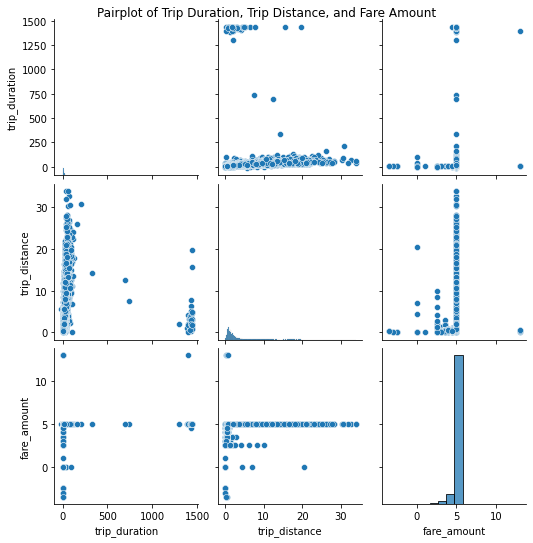

In [160]:
# 시각화
sns.pairplot(df[['trip_duration', 'trip_distance', 'fare_amount']])
plt.suptitle('Pairplot of Trip Duration, Trip Distance, and Fare Amount', y=1)
plt.show()

# 시간대별 수요 분석

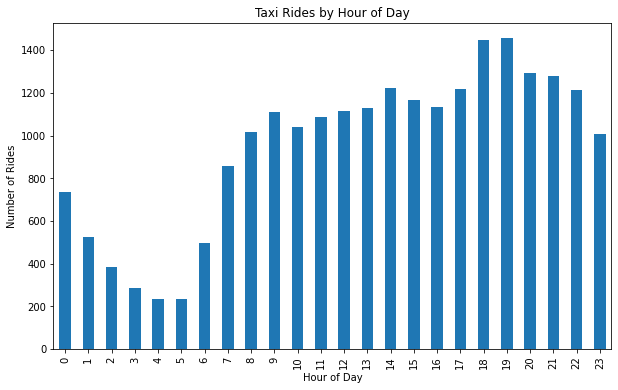

In [166]:
df['hour'] = df['tpep_pickup_datetime'].dt.hour
peak_hours = df.groupby('hour').size()

plt.figure(figsize=(10, 6))
peak_hours.plot(kind='bar')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.title('Taxi Rides by Hour of Day')
plt.show()

# 계절별 피크 시간 분석

In [175]:
data['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

In [176]:
def get_season(date):
    if date.month in [12, 1, 2]:
        return 'Winter'
    elif date.month in [3, 4, 5]:
        return 'Spring'
    elif date.month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

In [177]:
df['season'] = df['tpep_pickup_datetime'].apply(get_season)
df['hour'] = df['tpep_pickup_datetime'].dt.hour

In [178]:
seasonal_peak_hours = df.groupby(['season', 'hour']).size().unstack(level=0)

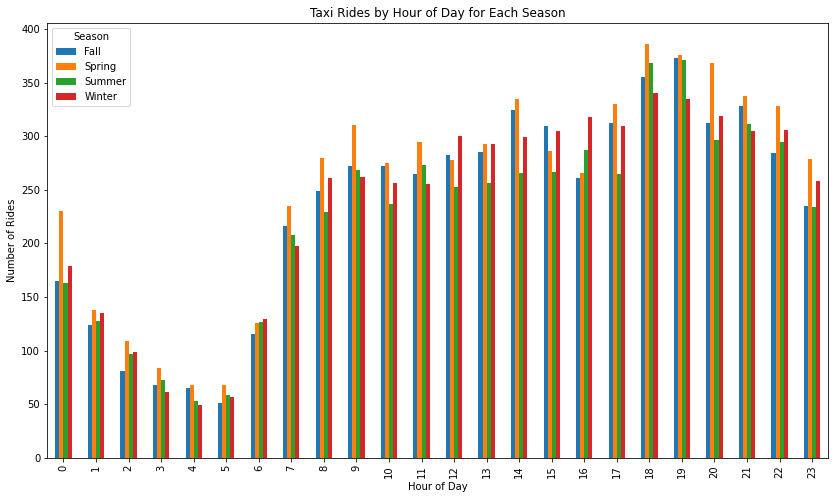

In [179]:
seasonal_peak_hours.plot(kind='bar', figsize=(14, 8))
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.title('Taxi Rides by Hour of Day for Each Season')
plt.legend(title='Season')
plt.show()

In [167]:
data

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,trip_duration
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,4,3.34,5.0,2.76,0.00,14.066667
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,5.0,4.00,0.00,26.500000
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,5.0,1.45,0.00,7.200000
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,5.0,6.39,0.00,30.250000
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,5.0,0.00,0.00,16.716667
...,...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,2017-02-24 17:37:23,2017-02-24 17:40:39,Cash,3,0.61,4.0,0.00,0.00,3.266667
22697,Monique Williams,2017-08-06 16:43:59,2017-08-06 17:24:47,Cash,1,16.71,5.0,1.00,5.76,40.800000
22698,Drew Graves,2017-09-04 14:54:14,2017-09-04 14:58:22,Card,1,0.42,4.5,0.00,0.00,4.133333
22699,Jonathan Copeland,2017-07-15 12:56:30,2017-07-15 13:08:26,Card,1,2.36,5.0,1.70,0.00,11.933333


In [168]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,trip_duration
count,22698.000000,22698.000000,22698.000000,22698.000000,22698.000000,22698.000000
mean,1.530840,2.912318,4.925558,1.567676,0.312302,17.011786
std,0.970302,3.651335,0.401994,1.750341,1.398775,61.997201
min,0.000000,0.000000,0.010000,0.000000,0.000000,-16.983333
25%,1.000000,0.990000,5.000000,0.000000,0.000000,6.650000
50%,1.000000,1.610000,5.000000,1.250000,0.000000,11.175000
75%,2.000000,3.060000,5.000000,2.260000,0.000000,18.383333
max,4.000000,33.960000,13.000000,9.990000,19.100000,1439.550000


# 회고
앞서 타이타닉 데이터로 실습했던 내용을 접목하여 trip 데이터를 활용해 미니 프로젝트를 해보았다. 결측치를 확인하고 이상치를 판단하고 처리함에 있어서 어디부터를 이상치로 해야할까에 대한 고민을 좀 많이 했던것 같다. 생각보다 별 것 아닌데 이런거에 붙잡혀있는 시간을 좀 줄여야할 것 같다. 그리고 상관관계에 대해서 좀 더 알아봐야 할 것 같다. 아직 잘 모르겠다. 그래도 오늘 배운 부분에 대해서 프로젝트에서 다시 떠올리면서 활용하는 과정에서 더 확실히 이해할 수 있었다.